In [67]:
import pandas as pd
df = pd.read_csv('statistics.txt',header=None,sep=' ')
df = df.drop(columns=[7])
columns = ['susceptible','presymptomatic','asymptomatic','mild','severe','recovered','dead']
df.columns = columns
df

,susceptible,presymptomatic,asymptomatic,mild,severe,recovered,dead
0,9984,6,0,10,0,0,0
1,9963,24,3,10,0,0,0
2,9859,102,29,10,0,0,0
3,9440,438,112,9,1,0,0
4,9085,718,182,13,2,0,0
...,...,...,...,...,...,...,...
115,5037,0,1,5,2,4872,83
116,5037,0,1,2,3,4874,83
117,5037,0,1,0,3,4876,83
118,5037,0,1,0,3,4876,83


## 1

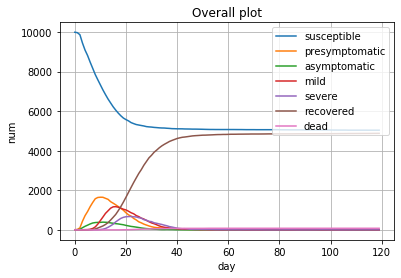

In [68]:
import matplotlib.pyplot as plt
for column in columns:
    plt.plot(df.index, df[column],label = column)
plt.legend(loc = 'upper right')
plt.title('Overall plot')
plt.xlabel('day')
plt.ylabel('num')
plt.grid()
plt.show()

## 2

In [69]:
import matplotlib.pyplot as plt
df['Daily Confirmed Cases cumsum'] = df['presymptomatic']+df['asymptomatic']
# shift one day
df['Daily Confirmed Cases'] = df['Daily Confirmed Cases cumsum'].shift()
# the next day - now day
df['Daily Confirmed Cases'] = df['Daily Confirmed Cases cumsum'] - df['Daily Confirmed Cases'] 
# initial the first day instead of nan
df.iloc[0,8] = df.iloc[0,7]
# change the negative value to zero
df.loc[df['Daily Confirmed Cases'] < 0, 'Daily Confirmed Cases'] = 0
df

,susceptible,presymptomatic,asymptomatic,mild,severe,recovered,dead,Daily Confirmed Cases cumsum,Daily Confirmed Cases
0,9984,6,0,10,0,0,0,6,6.0
1,9963,24,3,10,0,0,0,27,21.0
2,9859,102,29,10,0,0,0,131,104.0
3,9440,438,112,9,1,0,0,550,419.0
4,9085,718,182,13,2,0,0,900,350.0
...,...,...,...,...,...,...,...,...,...
115,5037,0,1,5,2,4872,83,1,1.0
116,5037,0,1,2,3,4874,83,1,0.0
117,5037,0,1,0,3,4876,83,1,0.0
118,5037,0,1,0,3,4876,83,1,0.0


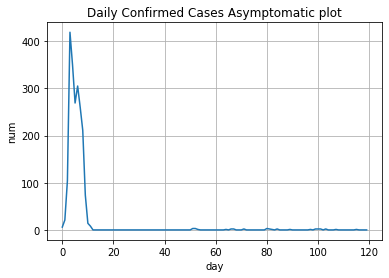

In [70]:
plt.plot(df.index, df['Daily Confirmed Cases'])
plt.title('Daily Confirmed Cases Asymptomatic plot')
plt.xlabel('day')
plt.ylabel('num')
plt.grid()
plt.show()

## 3

In [73]:
import matplotlib.pyplot as plt
df['Daily growth accum'] = df['presymptomatic']+df['asymptomatic']+df['mild'] + df['severe']
# shift one day
df['Daily growth'] = df['Daily growth accum'].shift()
# the next day - now day
df['Daily growth'] = df['Daily growth accum'] - df['Daily growth']
df.loc[0,'Daily growth'] = df.loc[0,'Daily growth accum']
# change the negative value to zero
df.loc[df['Daily growth'] < 0, 'Daily growth'] = 0
df

,susceptible,presymptomatic,asymptomatic,mild,severe,recovered,dead,Daily Confirmed Cases cumsum,Daily Confirmed Cases,Daily growth accum,Daily growth
0,9984,6,0,10,0,0,0,6,6.0,16,16.0
1,9963,24,3,10,0,0,0,27,21.0,37,21.0
2,9859,102,29,10,0,0,0,131,104.0,141,104.0
3,9440,438,112,9,1,0,0,550,419.0,560,419.0
4,9085,718,182,13,2,0,0,900,350.0,915,355.0
...,...,...,...,...,...,...,...,...,...,...,...
115,5037,0,1,5,2,4872,83,1,1.0,8,1.0
116,5037,0,1,2,3,4874,83,1,0.0,6,0.0
117,5037,0,1,0,3,4876,83,1,0.0,4,0.0
118,5037,0,1,0,3,4876,83,1,0.0,4,0.0


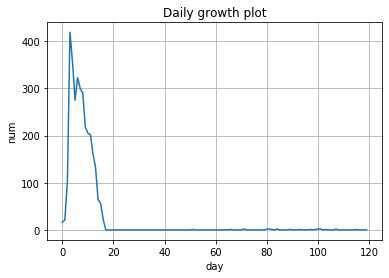

In [74]:
plt.plot(df.index, df['Daily growth'])
plt.title('Daily growth plot')
plt.xlabel('day')
plt.ylabel('num')
plt.grid()
plt.show()

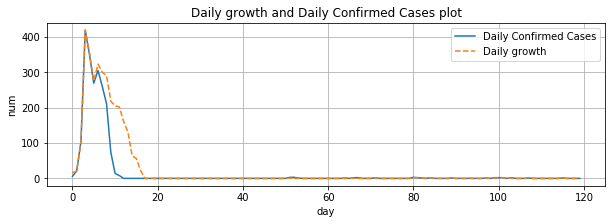

In [94]:
plt.figure(figsize=(10,3))
plt.plot(df.index, df['Daily Confirmed Cases'],linestyle='-', label='Daily Confirmed Cases')
plt.plot(df.index, df['Daily growth'],linestyle='--', label='Daily growth')
plt.title('Daily growth and Daily Confirmed Cases plot')
plt.xlabel('day')
plt.ylabel('num')
plt.legend()
plt.grid()
plt.show()

## 4

In [76]:
df['Daily number of existing cases'] = df['presymptomatic'] + df['asymptomatic'] + df['mild'] + df['severe']
df

,susceptible,presymptomatic,asymptomatic,mild,severe,recovered,dead,Daily Confirmed Cases cumsum,Daily Confirmed Cases,Daily growth accum,Daily growth,Daily number of existing cases
0,9984,6,0,10,0,0,0,6,6.0,16,16.0,16
1,9963,24,3,10,0,0,0,27,21.0,37,21.0,37
2,9859,102,29,10,0,0,0,131,104.0,141,104.0,141
3,9440,438,112,9,1,0,0,550,419.0,560,419.0,560
4,9085,718,182,13,2,0,0,900,350.0,915,355.0,915
...,...,...,...,...,...,...,...,...,...,...,...,...
115,5037,0,1,5,2,4872,83,1,1.0,8,1.0,8
116,5037,0,1,2,3,4874,83,1,0.0,6,0.0,6
117,5037,0,1,0,3,4876,83,1,0.0,4,0.0,4
118,5037,0,1,0,3,4876,83,1,0.0,4,0.0,4


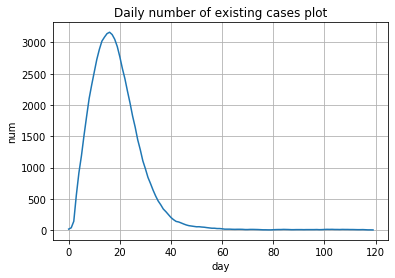

In [77]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Daily number of existing cases'])
plt.title('Daily number of existing cases plot')
plt.xlabel('day')
plt.ylabel('num')
plt.grid()
plt.show()

## 5

In [78]:
df['Cumulative diagnosis'] = df['presymptomatic']+df['asymptomatic']+df['mild']+df['severe']+df['recovered']+df['dead']
df



,susceptible,presymptomatic,asymptomatic,mild,severe,recovered,dead,Daily Confirmed Cases cumsum,Daily Confirmed Cases,Daily growth accum,Daily growth,Daily number of existing cases,Cumulative diagnosis
0,9984,6,0,10,0,0,0,6,6.0,16,16.0,16,16
1,9963,24,3,10,0,0,0,27,21.0,37,21.0,37,37
2,9859,102,29,10,0,0,0,131,104.0,141,104.0,141,141
3,9440,438,112,9,1,0,0,550,419.0,560,419.0,560,560
4,9085,718,182,13,2,0,0,900,350.0,915,355.0,915,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5037,0,1,5,2,4872,83,1,1.0,8,1.0,8,4963
116,5037,0,1,2,3,4874,83,1,0.0,6,0.0,6,4963
117,5037,0,1,0,3,4876,83,1,0.0,4,0.0,4,4963
118,5037,0,1,0,3,4876,83,1,0.0,4,0.0,4,4963


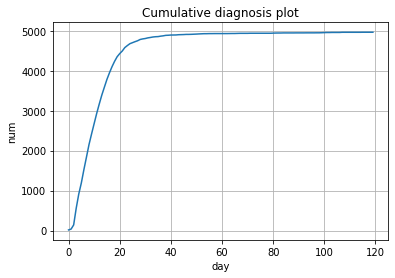

In [79]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Cumulative diagnosis'])
plt.title('Cumulative diagnosis plot')
plt.xlabel('day')
plt.ylabel('num')
plt.grid()
plt.show()

## 6

In [83]:
import matplotlib.pyplot as plt
df['dead growth'] = df['presymptomatic']+df['asymptomatic']+df['mild'] + df['severe']
# shift one day
df['dead growth'] = df['dead'].shift()
# the next day - now day
df['dead growth'] = df['dead'] - df['dead growth']
df.loc[0,'dead growth'] = df.loc[0,'dead']
# change the negative value to zero
df.loc[df['dead growth'] < 0, 'dead growth'] = 0
df

,susceptible,presymptomatic,asymptomatic,mild,severe,recovered,dead,Daily Confirmed Cases cumsum,Daily Confirmed Cases,Daily growth accum,Daily growth,Daily number of existing cases,Cumulative diagnosis,dead growth
0,9984,6,0,10,0,0,0,6,6.0,16,16.0,16,16,0.0
1,9963,24,3,10,0,0,0,27,21.0,37,21.0,37,37,0.0
2,9859,102,29,10,0,0,0,131,104.0,141,104.0,141,141,0.0
3,9440,438,112,9,1,0,0,550,419.0,560,419.0,560,560,0.0
4,9085,718,182,13,2,0,0,900,350.0,915,355.0,915,915,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5037,0,1,5,2,4872,83,1,1.0,8,1.0,8,4963,0.0
116,5037,0,1,2,3,4874,83,1,0.0,6,0.0,6,4963,0.0
117,5037,0,1,0,3,4876,83,1,0.0,4,0.0,4,4963,0.0
118,5037,0,1,0,3,4876,83,1,0.0,4,0.0,4,4963,0.0


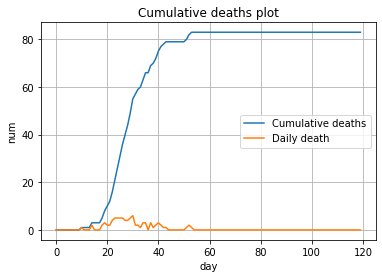

In [85]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['dead'], label='Cumulative deaths')
plt.plot(df.index, df['dead growth'], label='Daily death')
plt.title('Cumulative deaths plot')
plt.xlabel('day')
plt.ylabel('num')
plt.legend(loc='best')
plt.grid()
plt.show()